In [3]:
#import libraries
from sklearn.cluster import KMeans


In [7]:
from PIL import Image

In [8]:
import os

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import matplotlib.image as mpimg

In [12]:
img=Image.open('Tiger.png')

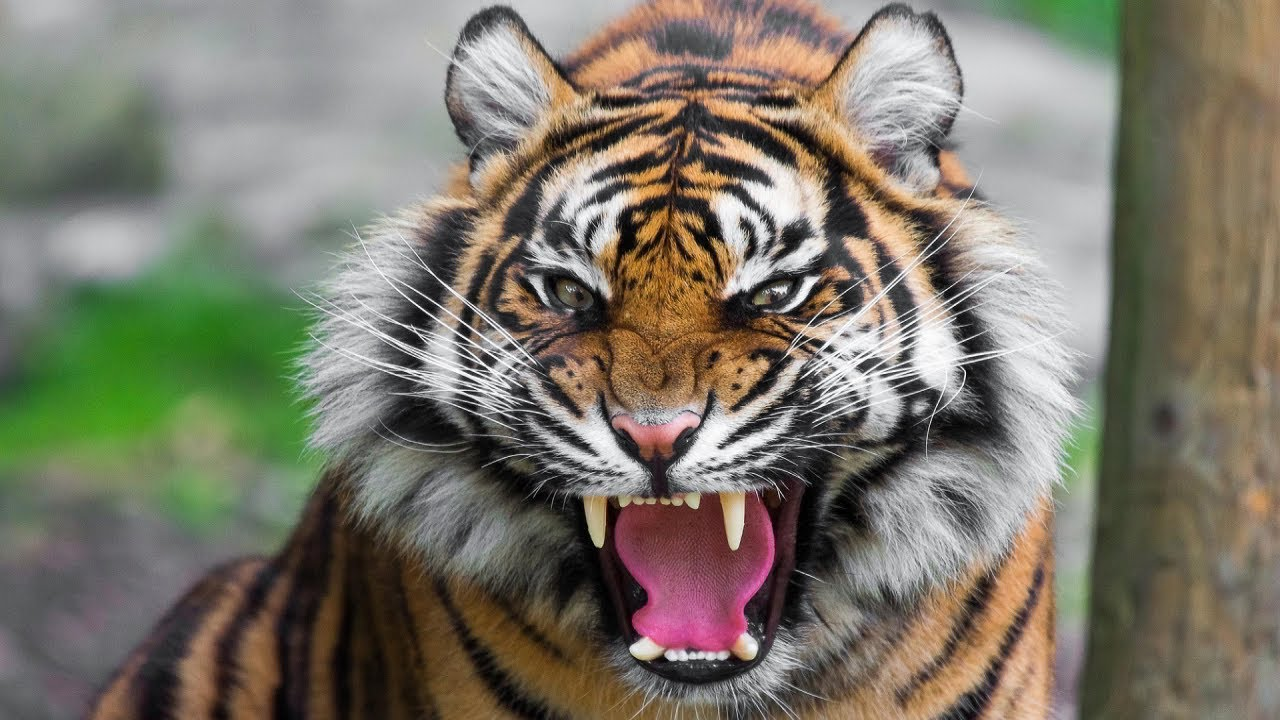

In [13]:
img

In [16]:
#get the image and its corresponding RGB values
import numpy as np
img_np=np.asarray(img)
img_np[0:2]

array([[[164, 160, 159],
        [165, 161, 160],
        [164, 163, 161],
        ...,
        [160, 128,  90],
        [158, 125,  90],
        [161, 128,  93]],

       [[164, 160, 159],
        [164, 160, 159],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]]], dtype=uint8)

In [17]:
#get the image dimestnions
img_np.shape

(720, 1280, 3)

In [24]:
#reshape the data
pixels=img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(921600, 3)

In [28]:
#define the KMeans model
model=KMeans(n_clusters=16)
model.fit(pixels)

KMeans(n_clusters=16)

In [30]:
pixel_centroids=model.labels_

In [31]:
#definethe cluster centers
cluster_centers=model.cluster_centers_
pixel_centroids

array([12, 12, 12, ...,  7,  7,  7])

In [32]:
cluster_centers

array([[ 25.29077195,  19.53346427,  17.16798983],
       [175.17311773, 175.87156355, 176.15406684],
       [ 94.17979681,  91.2488526 ,  82.57710988],
       [229.53538323, 228.46134693, 228.6479676 ],
       [130.59197329, 134.99882182, 123.1439339 ],
       [ 70.20963526,  69.29985803,  58.62220542],
       [211.36928678, 169.37032703, 134.12645472],
       [108.33066343, 117.26149098, 102.99698718],
       [202.14160831, 199.69578994, 198.23978357],
       [175.49317402, 136.91311174, 102.03454241],
       [ 52.55772135,  42.99837959,  37.16773645],
       [ 61.20909136, 126.58046409,  44.14742144],
       [152.84226828, 155.46185868, 153.66610088],
       [135.3395627 , 109.36544846,  83.66842196],
       [106.7113784 ,  70.02925802,  43.92207166],
       [188.02350917,  85.19853784, 131.59002294]])

In [37]:
#Cluster assignment
final=np.zeros((pixel_centroids.shape[0],3))
for cluster_number in range(16):
    final[pixel_centroids==cluster_number]=cluster_centers[cluster_number]
final[0:5]

array([[152.84226828, 155.46185868, 153.66610088],
       [152.84226828, 155.46185868, 153.66610088],
       [152.84226828, 155.46185868, 153.66610088],
       [152.84226828, 155.46185868, 153.66610088],
       [152.84226828, 155.46185868, 153.66610088]])

In [38]:
#reshape the orginal dimesions.
comp_img=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_img.shape

(720, 1280, 3)

In [43]:
#convert pixel values to image
comp_img=Image.fromarray (np.uint8(comp_img))
comp_img.save('tiger_compressed.png')
img_1 =mpimg.imread('tiger.png')
img_2 =mpimg.imread ('tiger_compressed.png')

<function matplotlib.pyplot.show(close=None, block=None)>

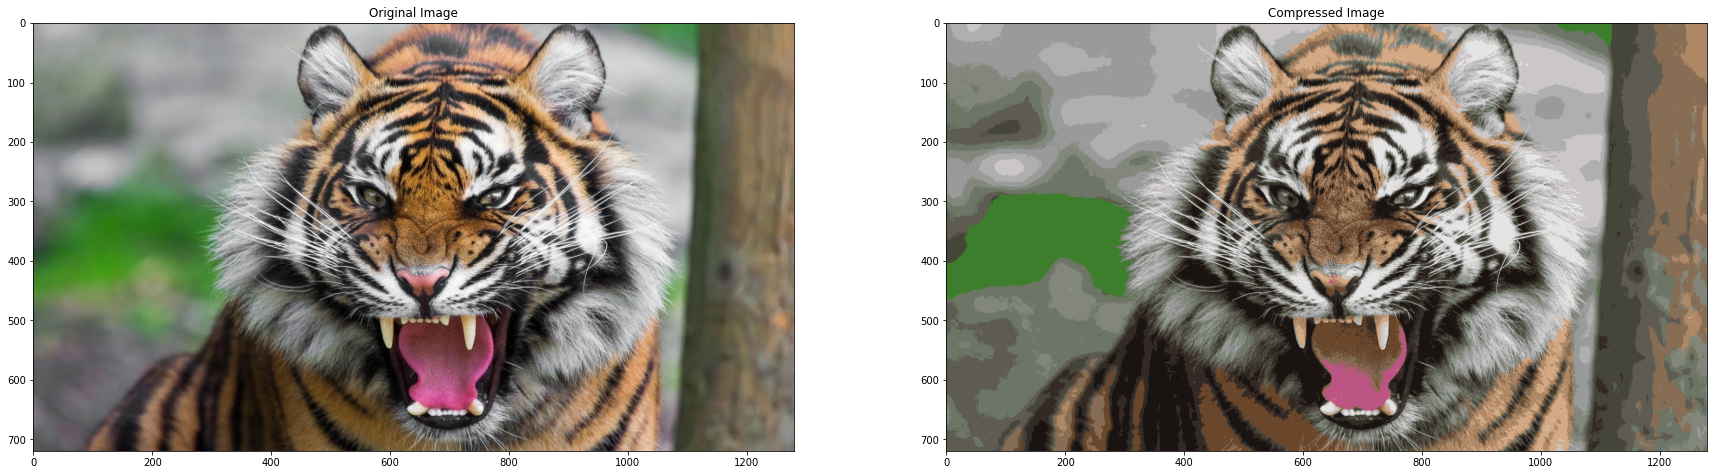

In [58]:
#original plot Vs compressed image
fig,(ax1,ax2) =plt.subplots (1,2,  figsize =(30,36))
ax1.imshow(img_1)
ax1.set_title('Original Image')
ax2.imshow(img_2)
ax2.set_title('Compressed Image')
plt.show